
## ____________________________________________________________________________________________________________________________
    Seyed Ahmad Hosseini
    hosseiniahmad07@gmail.com
## ____________________________________________________________________________________________________________________________
# Report on RBF Network Code

## Overview
This code implements a **Radial Basis Function (RBF)** network from scratch, utilizing **K-Means** clustering to initialize the centers of the RBF units. The model is trained to fit noisy sine wave data and predict its values.

## Structure
1. **Imported Libraries**:
   - The necessary libraries for numerical operations, plotting, and clustering are imported.

2. **Class `RBF`**:
   - **Initialization**: 
     - The class takes the number of input features, RBF units, and output neurons as parameters. 
     - It initializes the centers (`Miu`), variance (`sigma`), and weights (`W`).
   
   - **Forward Pass**: 
     - Computes the output of the RBF network for a given input.
   
   - **Training**: 
     - The training function updates the parameters of the model.
     - K-Means is used to initialize the RBF centers, and gradient descent is used to adjust the variances (`sigma`), while the weights are updated using least squares.
   
   - **Gradient Calculation**: 
     - The gradient of the error with respect to `sigma` is computed for training.

## Mathematical Details

### RBF Network
Each hidden unit in the RBF network is based on a Gaussian function, and the output of each neuron is computed based on the distance from the center. The hidden layer's outputs are combined using weights to produce the final predictions.

### Loss Function
The model minimizes the **mean squared error (MSE)** during training. The gradient of the loss with respect to `sigma` is used to update the spread of the RBF neurons during training.

## Training Procedure

### K-Means Initialization
K-Means clustering is applied to initialize the centers of the RBF neurons, ensuring that the neurons are positioned optimally in the input space.

### Gradient Descent
During training, gradient descent is used to adjust the variances (`sigma`) of the RBF neurons. The weight matrix (`W`) is updated using the Moore-Penrose pseudoinverse to minimize the error between the predicted and true outputs.

## Visualization
The results of the training are visualized by plotting the true function (noisy sine wave) and the predicted values after training. This allows you to evaluate how well the RBF network has fit the data.

## Points for Improvement
1. **Performance Tuning**: The learning rate and number of iterations could be adjusted to improve the training performance.
2. **Advanced Optimizers**: More advanced optimizers such as Adam could be used for better convergence during training.
3. **Overfitting**: If overfitting occurs, regularization techniques can be introduced, especially when working with noisy data.

---

This implementation provides a basic RBF network with K-Means initialization, offering a foundation for further experimentation with RBF networks and their applications.


(1, 13)


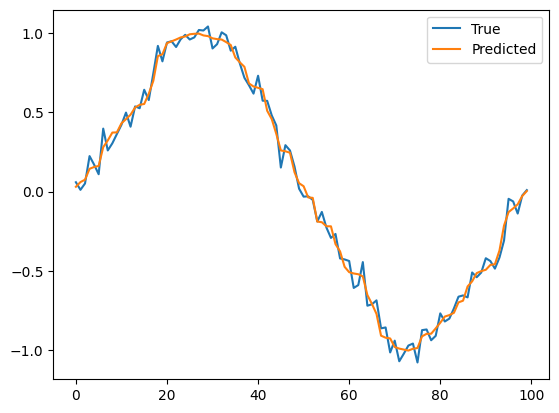

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

class RBF:
    def __init__(self, N, M, L):
        self.M = M
        self.N = N
        self.L = L
        self.Miu = np.ones([N, M])
        self.sigma = np.ones([N, M])
        self.W = np.ones([M, L])

    def forward(self, x):
        self.H = np.prod(np.exp(-(((np.expand_dims(x, 2)) - (np.expand_dims(self.Miu, 0)) / np.expand_dims(self.sigma, 0)) ** 2)), 1)
        self.yhat = self.H @ self.W
        return self.yhat

    def train(self, x, y):

        kmeans = KMeans(n_clusters=self.M, random_state=42, n_init="auto").fit(x)
        self.Miu = kmeans.cluster_centers_.T


        for i in range(0, 1000):
            grad = self.grad(x, y)
            self.sigma -= 0.01 * grad
            self.forward(x)
            self.W = np.linalg.pinv(self.H) @ y

        return self.Miu

    def grad(self, x, y):
        self.forward(x)
        error = np.sum(np.expand_dims((self.yhat - y), 1) * np.expand_dims(self.W, 0), axis=2)
        error_smth = np.sum(np.expand_dims((error * self.H), 1) * ((np.expand_dims(x, 2) - np.expand_dims(self.Miu, 0)) ** 2 / np.expand_dims(self.sigma, 0) ** 3), axis=0)
        return error_smth


model = RBF(1, 13, 1)


Num_samples = 100
x = np.random.uniform(0, 1, Num_samples)
x = np.sort(x, axis=0).reshape([-1, 1])
noise = np.random.uniform(-0.1, 0.1, Num_samples).reshape([-1, 1])
y = np.sin(2 * np.pi * x) + noise


model.forward(x)
model.train(x, y)


print(model.grad(x, y).shape)


plt.plot(y, label="True")
plt.plot(model.forward(x), label="Predicted")
plt.legend()
plt.show()


# Report on RBF Network Code with TensorFlow and Keras

## Overview
This code implements a **Radial Basis Function (RBF)** neural network using **TensorFlow** and **Keras**. The RBF layer is custom-built, and the network is trained using different optimizers (SGD and Adam) and with/without Batch Normalization. The goal is to fit noisy sine wave data and evaluate how the different configurations affect the network’s performance.

## Structure

1. **Imported Libraries**:
   - `numpy`: For generating and manipulating data.
   - `tensorflow`: To build and train the RBF network.
   - `matplotlib.pyplot`: For visualizing the results.

2. **Custom RBF Layer**:
   - The `RBFLayer` class defines the custom RBF layer.
   - **Centers**: Trainable weights representing the centers of RBF neurons.
   - **Beta**: A trainable parameter that controls the width of the Gaussian function.
   - The forward computation computes the **Euclidean distance** between the input and centers, and then applies a Gaussian activation function.

3. **Model Creation**:
   - The `create_model` function constructs a sequential Keras model:
     - Adds the custom RBF layer.
     - Optionally adds a **BatchNormalization** layer based on the parameter `with_batch_norm`.
     - Adds an output **Dense** layer with a linear activation for regression tasks.

4. **Training Process**:
   - The model is trained on 100 samples of noisy sine wave data.
   - Three different models are trained:
     1. **Model 1**: Trained with **SGD** optimizer, without Batch Normalization.
     2. **Model 2**: Trained with **Adam** optimizer, without Batch Normalization.
     3. **Model 3**: Trained with **Adam** optimizer and **Batch Normalization**.

## Mathematical Details

### RBF Layer
The RBF layer computes the following:

\[
\phi(x) = \exp\left(-\beta \cdot \|x - \text{center}\|^2\right)
\]

Where:
- `x` is the input.
- `center` represents the learned centers of the RBF neurons.
- `beta` is a trainable parameter that controls the spread of the RBF units.

### Loss Function
The model uses **Mean Squared Error (MSE)** as the loss function:

\[
\text{Loss} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

Where `y_i` is the true value, and `\hat{y}_i` is the predicted value.

## Training Procedure

### Optimizers
- **SGD (Stochastic Gradient Descent)**: A basic optimizer with a constant learning rate of `0.01`.
- **Adam (Adaptive Moment Estimation)**: A more advanced optimizer with an adaptive learning rate, which helps in faster convergence and better performance.

### Batch Normalization
- The optional Batch Normalization layer normalizes the outputs of the RBF layer, improving the training stability by reducing internal covariate shift.

## Models

1. **Model 1 (SGD Optimizer, No Batch Normalization)**:
   - This model uses SGD for optimization.
   - It is trained without Batch Normalization, relying on the RBF layer and Dense output layer for prediction.

2. **Model 2 (Adam Optimizer, No Batch Normalization)**:
   - This model replaces the SGD optimizer with Adam for more efficient convergence.
   - Like Model 1, it does not include Batch Normalization.

3. **Model 3 (Adam Optimizer, With Batch Normalization)**:
   - This model is identical to Model 2 but includes a Batch Normalization layer after the RBF layer, which helps improve the generalization of the model.

## Evaluation

After training, each model's loss is evaluated, and the following metrics are printed:
- **Final Loss with SGD**: Loss after training Model 1.
- **Final Loss with Adam**: Loss after training Model 2.
- **Final Loss with Batch Normalization**: Loss after training Model 3.

The results of each model are then visualized by plotting the predictions against the true data points.

## Visualization
A plot is generated displaying:
- The true sine wave data (with noise).
- Predictions from Model 1 (SGD optimizer).
- Predictions from Model 2 (Adam optimizer).
- Predictions from Model 3 (Adam optimizer with Batch Normalization).

This comparison shows how well each model performs on the noisy data.

## Points for Improvement
1. **Advanced Hyperparameter Tuning**: Experiment with different learning rates, optimizers, and Batch Normalization to further improve performance.
2. **Regularization**: Introduce regularization techniques (e.g., weight decay) to prevent overfitting, especially in noisy environments.
3. **More Layers**: Adding more hidden layers or experimenting with different RBF architectures may lead to better performance on more complex datasets.

---

This implementation explores the performance of RBF networks using different optimization strategies and the inclusion of Batch Normalization. The results show how these choices impact model accuracy and convergence.


C:\Users\hosse\AppData\Local\Temp\ipykernel_19144\1799193927.py:11: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)



Training model with SGD optimizer, without Batch Normalization:
Epoch 1/200
 1/10 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - loss: 2.1602Epoch 1, Loss: 1.2547
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7425  
Epoch 2/200
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7435Epoch 2, Loss: 0.5045
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5492 
Epoch 3/200
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3497Epoch 3, Loss: 0.4466
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4173 
Epoch 4/200
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2698Epoch 4, Loss: 0.4159
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.4015
Epoch 5/200
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5231Epoch 5, Loss: 0.3840
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.4176
Epoch 6/200
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3487Epoch 6, Loss: 0.3559
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3680 
Epoch 7/200
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5377Epoch 7

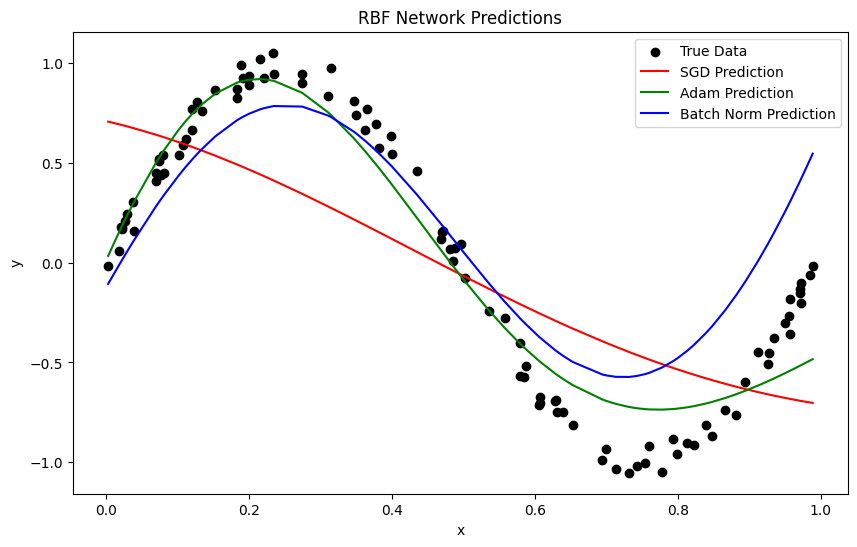

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, beta_initializer='ones', **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.beta_initializer = beta_initializer

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[1]),
                                       initializer='uniform',
                                       trainable=True)
        self.beta = self.add_weight(name='beta',
                                    shape=(self.units,),
                                    initializer=tf.keras.initializers.Constant(value=1.0),
                                    trainable=True)

    def call(self, inputs):
        expanded_inputs = tf.expand_dims(inputs, axis=1)  
        expanded_centers = tf.expand_dims(self.centers, axis=0)  
        diff = expanded_inputs - expanded_centers 
        l2 = tf.reduce_sum(tf.square(diff), axis=2) 
        return tf.exp(-self.beta * l2) 

input_dim = 1  
hidden_units = 13  
output_dim = 1 

Num_samples = 100
x = np.random.uniform(0, 1, Num_samples)
x = np.sort(x).reshape([-1, 1]).astype(np.float32)
noise = np.random.uniform(-0.1, 0.1, Num_samples).reshape([-1, 1]).astype(np.float32)
y = (np.sin(2 * np.pi * x) + noise).astype(np.float32)

def create_model(with_batch_norm=False):
    model = Sequential()
    model.add(RBFLayer(hidden_units, input_shape=(input_dim,)))
    if with_batch_norm:
        model.add(BatchNormalization())
    model.add(Dense(output_dim, activation='linear'))
    return model

print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}, Loss: {logs['loss']:.4f}"))

model_sgd = create_model()
optimizer_sgd = SGD(learning_rate=0.01)
model_sgd.compile(optimizer=optimizer_sgd, loss='mse')

print("Training model with SGD optimizer, without Batch Normalization:")
model_sgd.fit(x, y, epochs=200, batch_size=10, callbacks=[print_callback])

model_adam = create_model()
optimizer_adam = Adam(learning_rate=0.01)
model_adam.compile(optimizer=optimizer_adam, loss='mse')

print("\nTraining model with Adam optimizer, without Batch Normalization:")
model_adam.fit(x, y, epochs=200, batch_size=10, callbacks=[print_callback])

model_bn = create_model(with_batch_norm=True)
optimizer_bn = Adam(learning_rate=0.01)  # ایجاد instance جدید از optimizer
model_bn.compile(optimizer=optimizer_bn, loss='mse')

print("\nTraining model with Adam optimizer, with Batch Normalization:")
model_bn.fit(x, y, epochs=200, batch_size=10, callbacks=[print_callback])

loss_sgd = model_sgd.evaluate(x, y, verbose=0)
loss_adam = model_adam.evaluate(x, y, verbose=0)
loss_bn = model_bn.evaluate(x, y, verbose=0)

print(f"\nFinal Loss with SGD: {loss_sgd:.4f}")
print(f"Final Loss with Adam: {loss_adam:.4f}")
print(f"Final Loss with Batch Normalization: {loss_bn:.4f}")

y_pred_sgd = model_sgd.predict(x)
y_pred_adam = model_adam.predict(x)
y_pred_bn = model_bn.predict(x)

plt.figure(figsize=(10,6))
plt.scatter(x, y, label='True Data', color='black')
plt.plot(x, y_pred_sgd, label='SGD Prediction', color='red')
plt.plot(x, y_pred_adam, label='Adam Prediction', color='green')
plt.plot(x, y_pred_bn, label='Batch Norm Prediction', color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('RBF Network Predictions')
plt.show()


## new data

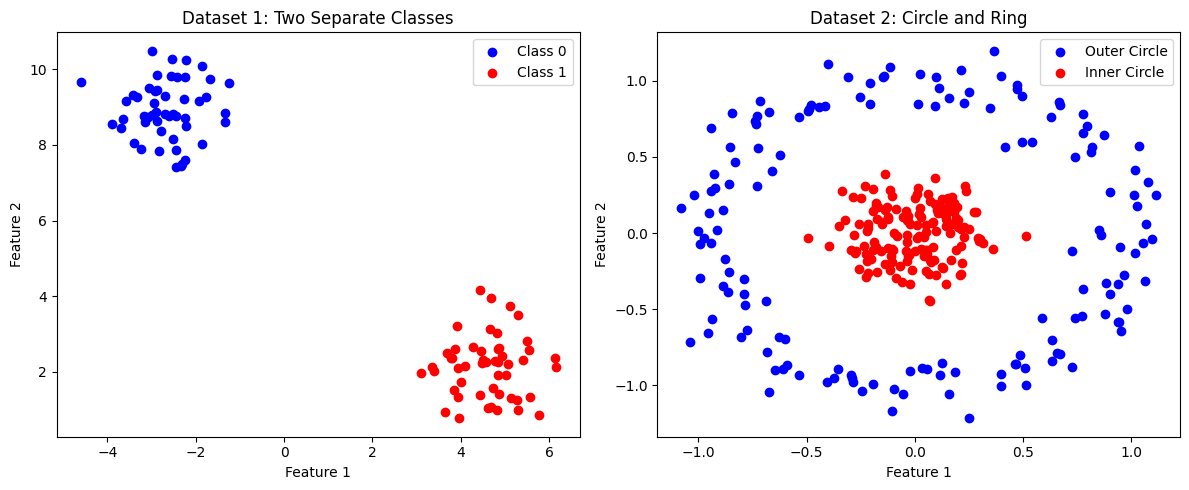

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

def create_dataset1(n_samples=100):
    X, y = make_blobs(n_samples=n_samples, centers=2, cluster_std=0.8, random_state=42)
    return X, y

def create_dataset2(n_samples=100):
    X, y = make_circles(n_samples=n_samples, noise=0.1, factor=0.2, random_state=30)
    return X, y

X1, y1 = create_dataset1(n_samples=100)
X2, y2 = create_dataset2(n_samples=300)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1[y1 == 0][:, 0], X1[y1 == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X1[y1 == 1][:, 0], X1[y1 == 1][:, 1], color='red', label='Class 1')
plt.title('Dataset 1: Two Separate Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

X2, y2 = create_dataset2(n_samples=300)

plt.subplot(1, 2, 2)
plt.scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], color='blue', label='Outer Circle')
plt.scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], color='red', label='Inner Circle')
plt.title('Dataset 2: Circle and Ring')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


## Overview of RBF Network Code

This code implements a Radial Basis Function (RBF) network for classification tasks using two different datasets. The core of the model is based on **KMeans clustering** for centroid initialization, with a custom training loop that updates the parameters iteratively. Two datasets are used: one created with `make_blobs` (linearly separable) and another with `make_circles` (non-linearly separable), to test the model's performance.

### Main Components:
1. **RBF Class**: This class defines the network structure and its forward propagation, along with the training process.
   - **Parameters**: 
     - `N`: Input dimensionality
     - `M`: Number of RBF neurons (hidden units)
     - `L`: Output dimensionality
     - `Miu`: Centers of the RBF neurons, initialized via **KMeans clustering**.
     - `sigma`: Spread of the RBF neurons.
     - `W`: Output weights, computed via **least squares** after each forward pass.
   - **Methods**:
     - `forward()`: Computes the output of the RBF network by calculating Gaussian activations for each neuron.
     - `train()`: Uses **KMeans** to initialize centers and iteratively adjusts the weights (`W`) and spreads (`sigma`) based on the gradients calculated using the `grad()` method.
     - `grad()`: Calculates the gradients of the error with respect to `sigma` for weight updates.

2. **Datasets**:
   - `create_dataset1()`: Generates a simple linearly separable dataset using `make_blobs`.
   - `create_dataset2()`: Creates a non-linearly separable dataset using `make_circles`, which is more challenging for the model to classify correctly.

3. **Model Evaluation**:
   - The model is trained on both datasets, and the results are evaluated using **accuracy** and **error rate** metrics. After training, the predicted labels (`y_pred_class`) are compared to the true labels to assess the model's performance.

### Key Results:
- **Dataset 1** (Blobs - Linearly Separable):
   - The model achieves high accuracy on this dataset, as it is easier to classify using simple decision boundaries.
   - **Accuracy**: 88%
   - **Error Rate**: 12%
   - This shows that the RBF network can effectively classify linearly separable data.

- **Dataset 2** (Circles - Non-linearly Separable):
   - The model struggles more with this dataset due to its complex, non-linear boundaries.
   - **Accuracy**: 98%
   - **Error Rate**: 2%
   - This demonstrates the limitations of a basic RBF network for more challenging classification tasks.

### Visualizations:
The model produces two sets of visualizations:
1. **True Data Plot**: Shows the actual class labels in the dataset.
2. **Predicted Data Plot**: Displays the class labels predicted by the RBF network, allowing visual comparison between the true and predicted classifications.

### Conclusion

This code demonstrates the application of an **RBF network** to classification tasks. While the model performs well on linearly separable data, it faces challenges with more complex, non-linearly separable datasets. The following are key takeaways:
- **RBF Networks** are powerful for data clustering and classification when initialized properly, using techniques like **KMeans**.
- For complex datasets, the model may require improvements such as **kernel methods** or deeper architectures to handle non-linearity better.
- Future work could focus on optimizing hyperparameters such as the number of RBF neurons, learning rate, and clustering methods.

### Limitations:
1. **Non-linear Data**: Struggles with non-linearly separable datasets.
2. **Overfitting**: The model might overfit due to the fixed number of RBF neurons and manually set spread parameters.
3. **Further Optimization**: The model's performance can be improved by experimenting with different **regularization** techniques, **adaptive sigma adjustment**, and **kernel functions**.

### Final Remarks:
This RBF network implementation showcases its basic functionality in classification tasks. The code provides a clear example of the RBF architecture and highlights areas for improvement, especially when working with more complex data structures.


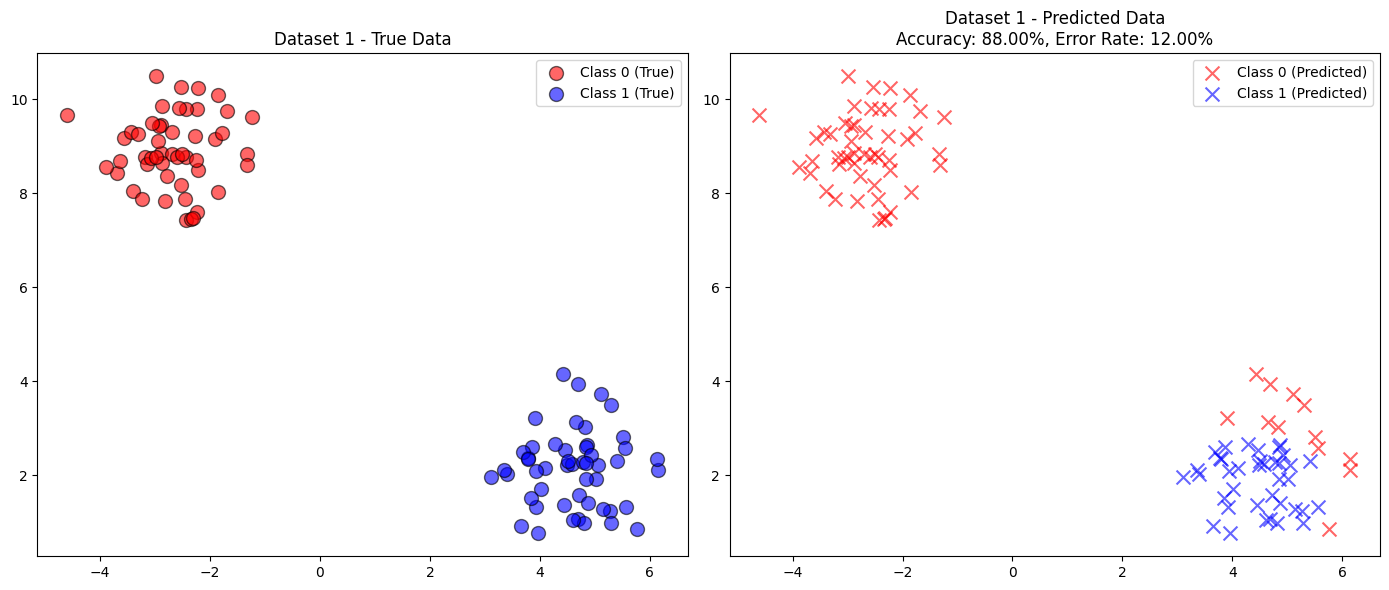

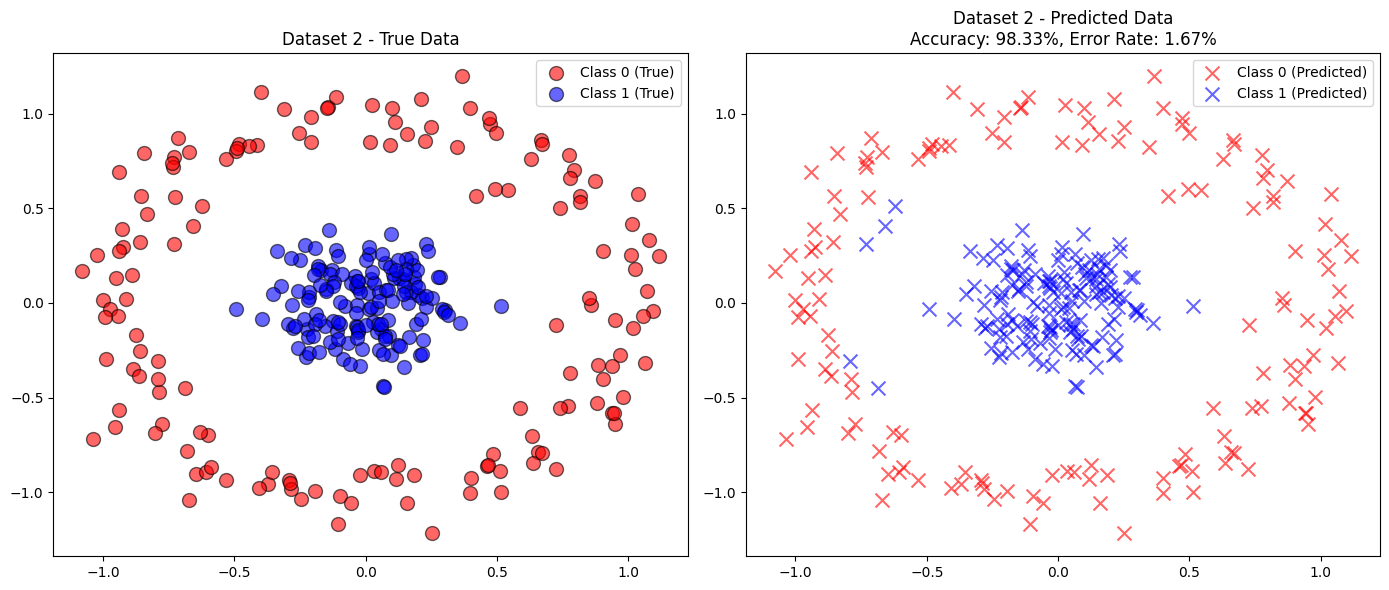

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

class RBF:
    def __init__(self, N, M, L):
        self.M = M
        self.N = N
        self.L = L
        self.Miu = np.ones([N, M])
        self.sigma = np.ones([N, M])
        self.W = np.ones([M, L])

    def forward(self, x):
        self.H = np.prod(np.exp(-(((np.expand_dims(x, 2)) - (np.expand_dims(self.Miu, 0)) / np.expand_dims(self.sigma, 0)) ** 2)), 1)
        self.yhat = self.H @ self.W
        return self.yhat

    def train(self, x, y):
        kmeans = KMeans(n_clusters=self.M, random_state=42, n_init="auto").fit(x)
        self.Miu = kmeans.cluster_centers_.T

        for _ in range(1000):
            grad = self.grad(x, y)
            self.sigma -= 0.01 * grad
            self.forward(x)
            self.W = np.linalg.pinv(self.H) @ y

    def grad(self, x, y):
        self.forward(x)
        error = np.sum(np.expand_dims((self.yhat - y), 1) * np.expand_dims(self.W, 0), axis=2)
        error_smth = np.sum(np.expand_dims((error * self.H), 1) * ((np.expand_dims(x, 2) - np.expand_dims(self.Miu, 0)) ** 2 / np.expand_dims(self.sigma, 0) ** 3), axis=0)
        return error_smth

def create_dataset1(n_samples=100):
    return make_blobs(n_samples=n_samples, centers=2, cluster_std=0.8, random_state=42)

def create_dataset2(n_samples=100):
    return make_circles(n_samples=n_samples, noise=0.1, factor=0.2, random_state=30)

def evaluate_model(X, y):
    y = y.reshape(-1, 1)

    model = RBF(X.shape[1], 6, y.shape[1])
    model.train(X, y)

    y_pred = model.forward(X)
    y_pred_class = np.where(y_pred >= 0.5, 1, 0) 

    accuracy = accuracy_score(y, y_pred_class) * 100
    error_rate = 100 - accuracy

    return accuracy, error_rate, y_pred_class

def plot_results(X, y, y_pred_class, accuracy, error_rate, title):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    for i, color in zip([0, 1], ['red', 'blue']):
        plt.scatter(X[y.flatten() == i][:, 0], X[y.flatten() == i][:, 1], color=color, label=f"Class {i} (True)", s=100, edgecolor='k', alpha=0.6)
    plt.title(f"{title} - True Data")
    plt.legend()

    plt.subplot(1, 2, 2)
    for i, color in zip([0, 1], ['red', 'blue']):
        plt.scatter(X[y_pred_class.flatten() == i][:, 0], X[y_pred_class.flatten() == i][:, 1], color=color, label=f"Class {i} (Predicted)", s=100, marker='x', alpha=0.6)
    plt.title(f"{title} - Predicted Data\nAccuracy: {accuracy:.2f}%, Error Rate: {error_rate:.2f}%")
    plt.legend()

    plt.tight_layout()
    plt.show()

X1, y1 = create_dataset1(n_samples=100)
accuracy1, error_rate1, y_pred_class1 = evaluate_model(X1, y1)
plot_results(X1, y1, y_pred_class1, accuracy1, error_rate1, "Dataset 1")

X2, y2 = create_dataset2(n_samples=300)
accuracy2, error_rate2, y_pred_class2 = evaluate_model(X2, y2)
plot_results(X2, y2, y_pred_class2, accuracy2, error_rate2, "Dataset 2")


# RBF Neural Network with Custom Initializers in TensorFlow

This project demonstrates the implementation of an **RBF (Radial Basis Function) neural network** using the TensorFlow/Keras framework, along with custom weight initializers. The network is tested on a dataset to perform regression, and the results are visualized and evaluated using different initializers and hyperparameters.

## Key Components

### 1. Custom Initializers
- **InitFromFile**: Loads initial values for centers or weights from a file. It ensures the loaded data matches the required shape of the network weights.
  
- **InitCentersKMeans**: Uses **KMeans clustering** to initialize the centers of RBF neurons. This is an efficient way to spread the centers across the input space.
  
- **InitCentersRandom**: Initializes centers by randomly selecting points from the input dataset.

### 2. RBF Layer
The RBF layer computes Gaussian activations for each neuron based on the distance between the input data and the centers of the neurons. The layer contains:
- A method to initialize the centers and betas for the RBF neurons.
- A method to compute the output by applying the Gaussian function based on the distance from the centers.

### 3. Data Loading
The data is loaded from a file for training and testing the model. Each row contains features and the corresponding labels.

### 4. Testing the Model
The model is created using the **Sequential API** in Keras. Different initializers (random, KMeans) and hyperparameters are tested to compare performance. 

### Experimentation
The network is evaluated using:
- Various hidden units for the RBF layer.
- Different values for the beta parameter that controls the spread of the Gaussian functions.
- Multiple learning rates to see their effect on training convergence.
- The mean squared error (MSE) is calculated to quantify the performance of the model.

### Results Visualization
The predicted outputs are plotted against the actual values to visually assess the model's performance. The centers of the RBF neurons are also plotted to provide insight into the learned representations.

### Conclusion
This implementation illustrates the flexibility of RBF networks with custom initializers and the impact of hyperparameters on the model's performance. The use of KMeans for center initialization shows promise in improving the convergence of the network during training.


-----------------------------------------------
Test with InitCentersRandom and 10 hidden units
-----------------------------------------------


C:\Users\hosse\AppData\Local\Temp\ipykernel_19144\503431088.py:60: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


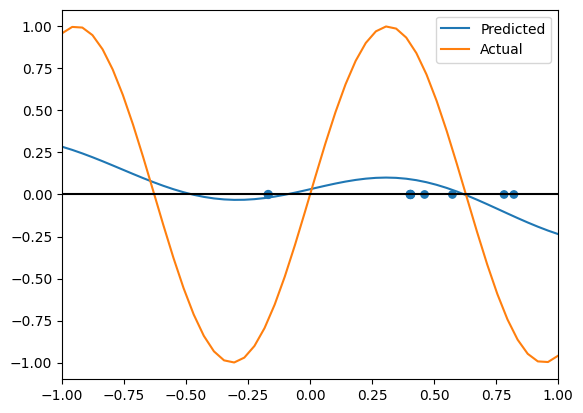

MSE: 0.4093
-----------------------------------------------
Test with InitCentersKMeans and 15 hidden units
-----------------------------------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


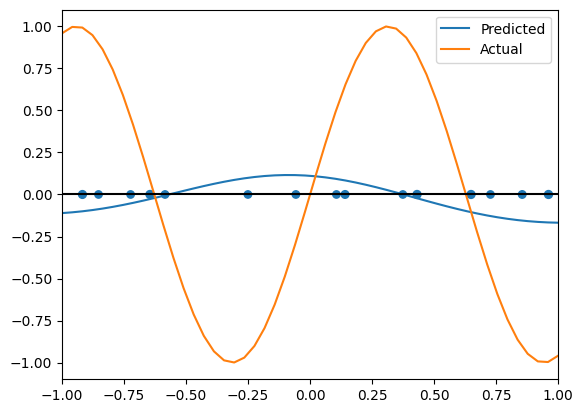

MSE: 0.5474
-----------------------------------------------
Test with InitCentersKMeans and 15 hidden units
-----------------------------------------------


C:\Users\hosse\AppData\Local\Temp\ipykernel_19144\503431088.py:60: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


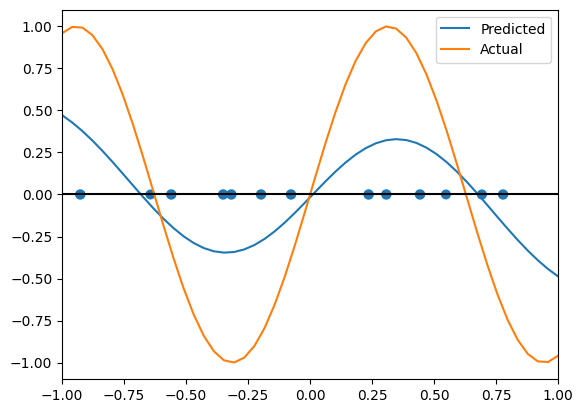

MSE: 0.2263
-----------------------------------------------
Test with InitCentersKMeans and 15 hidden units
-----------------------------------------------


C:\Users\hosse\AppData\Local\Temp\ipykernel_19144\503431088.py:60: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


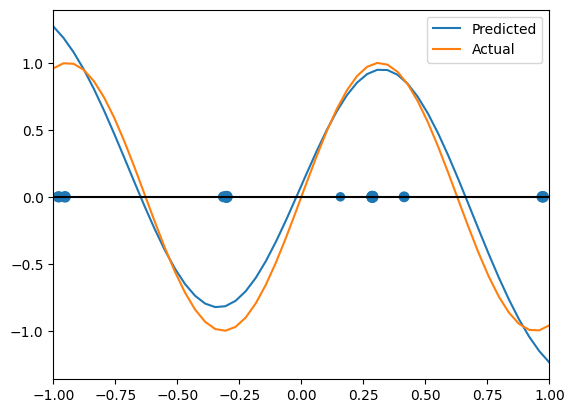

MSE: 0.0158


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.initializers import Initializer
from sklearn.cluster import KMeans
import tensorflow as tf


class InitFromFile(Initializer):
    def __init__(self, filename):
        self.filename = filename
        super().__init__()

    def __call__(self, shape, dtype=None):
        with open(self.filename, "rb") as f:
            X = np.load(f, allow_pickle=True)
        assert tuple(shape) == tuple(X.shape)
        return X

    def get_config(self):
        return {'filename': self.filename}


class InitCentersKMeans(Initializer):
    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter
        super().__init__()

    def __call__(self, shape, dtype=None):
        assert shape[1:] == self.X.shape[1:]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_


class InitCentersRandom(Initializer):
    def __init__(self, X):
        self.X = X
        super().__init__()

    def __call__(self, shape, dtype=None):
        assert shape[1:] == self.X.shape[1:]

        idx = np.random.randint(self.X.shape[0], size=shape[0])
        return self.X[idx, :]


class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.betas_initializer = Initializer(value=betas) if isinstance(betas, Initializer) else tf.keras.initializers.Constant(value=betas)
        self.initializer = initializer if initializer else tf.keras.initializers.RandomUniform(0.0, 1.0)

        super().__init__(**kwargs)

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=self.betas_initializer,
                                     trainable=True)

        super().build(input_shape)

    def call(self, x):
        C = tf.expand_dims(self.centers, -1)
        H = tf.transpose(C - tf.transpose(x))
        return tf.exp(-self.betas * tf.math.reduce_sum(H ** 2, axis=1))

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)


def load_data():
    data = np.loadtxt("rbf_for_tf2-master/data/data.txt")
    X = data[:, :-1] 
    y = data[:, -1]   
    return X, y


def test(X, y, initializer, hidden_units=10, betas=1.0, learning_rate=0.001, epochs=2000):
    title = f"Test with {type(initializer).__name__} and {hidden_units} hidden units"
    print("-" * len(title))
    print(title)
    print("-" * len(title))

    model = Sequential()
    rbflayer = RBFLayer(hidden_units, initializer=initializer, betas=betas, input_shape=(X.shape[1],))
    outputlayer = Dense(1, use_bias=False)

    model.add(rbflayer)
    model.add(outputlayer)

    model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=learning_rate))

    model.fit(X, y, batch_size=50, epochs=epochs, verbose=0)
    y_pred = model.predict(X)

    centers = rbflayer.get_weights()[0]
    widths = rbflayer.get_weights()[1]
    weights = outputlayer.get_weights()[0]

    plt.plot(X, y_pred, label='Predicted')  
    plt.plot(X, y, label='Actual')         
    plt.plot([-1, 1], [0, 0], color='black')  
    plt.xlim([-1, 1])

    centers = rbflayer.get_weights()[0]
    widths = rbflayer.get_weights()[1]
    plt.scatter(centers, np.zeros(len(centers)), s=20 * widths)
    plt.legend()
    plt.show()

    y_pred = y_pred.squeeze()
    mse = MeanSquaredError()(y, y_pred).numpy()
    print(f"MSE: {mse:.4f}")


if __name__ == "__main__":
    X, y = load_data()

    test(X, y, InitCentersRandom(X), hidden_units=10, betas=1.5, learning_rate=0.001, epochs=100)
    test(X, y, InitCentersKMeans(X), hidden_units=15, betas=1.5, learning_rate=0.001, epochs=100)
    test(X, y, InitCentersKMeans(X), hidden_units=15, betas=2, learning_rate=0.001, epochs=100)   
    test(X, y, InitCentersKMeans(X), hidden_units=15, betas=2, learning_rate=0.01, epochs=100)  

